In [1]:
#pip install torch

In [2]:
#pip install torch_geometric

In [3]:
import torch
import random
import matplotlib.pyplot as plt

c:\Users\mmocak\PycharmProjects\machine-learning-circus\.venv\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [4]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures
from torch_geometric.utils import subgraph

citeseer_dataset = Planetoid(root = "Citeseer_dataset", name = "Citeseer", transform = NormalizeFeatures())

In [5]:
data = citeseer_dataset[0]

# Create a mask for nodes whose label is either 0 or 1
mask = (data.y == 0) | (data.y == 1)
filtered_node_indices = mask.nonzero(as_tuple=False).view(-1)

# Extract the subgraph that contains only the filtered nodes. 
# The parameter relabel_nodes=True updates node indices accordingly.
edge_index, edge_attr = subgraph(filtered_node_indices, data.edge_index, relabel_nodes=True, num_nodes=data.num_nodes)

# Create a new data object for the filtered graph
filtered_data = data.__class__()
filtered_data.x = data.x[filtered_node_indices]
filtered_data.y = data.y[filtered_node_indices]
filtered_data.edge_index = edge_index
if hasattr(data, 'edge_attr') and data.edge_attr is not None:
    filtered_data.edge_attr = edge_attr

num_nodes = filtered_data.num_nodes
torch.manual_seed(42)
indices = torch.randperm(num_nodes)

train_end = int(0.6 * num_nodes)
val_end = int(0.8 * num_nodes)

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

train_mask[indices[:train_end]] = True
val_mask[indices[train_end:val_end]] = True
test_mask[indices[val_end:]] = True

filtered_data.train_mask = train_mask
filtered_data.val_mask = val_mask
filtered_data.test_mask = test_mask

filtered_citeseer_dataset = filtered_data


In [6]:
print(len(filtered_citeseer_dataset))
#print(filtered_citeseer_dataset.num_classes)
print(filtered_citeseer_dataset.num_features)
citeseer_graph = filtered_citeseer_dataset
citeseer_graph

6
3703


Data(x=[854, 3703], y=[854], edge_index=[2, 1320], train_mask=[854], val_mask=[854], test_mask=[854])

In [7]:
# use scaler and fit and transform the citeseer_graph x data
#from sklearn.preprocessing import StandardScaler
#import numpy as np
#scaler = StandardScaler()
#scaler.fit(citeseer_graph.x.numpy())
#citeseer_graph.x = torch.tensor(scaler.transform(citeseer_graph.x.numpy()), dtype=torch.float32)
#print(citeseer_graph.x[0:5])
#print(citeseer_graph.x.shape)


In [8]:
citeseer_graph.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [9]:
print("Training samples: ", citeseer_graph.train_mask.sum().item())
print("Validation samples: ", citeseer_graph.val_mask.sum().item())
print("Test samples: ", citeseer_graph.test_mask.sum().item())

Training samples:  512
Validation samples:  171
Test samples:  171


In [10]:
citeseer_graph.y

tensor([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
print(f'Number of nodes: {citeseer_graph.num_nodes}')
print(f'Number of edges: {citeseer_graph.num_edges}')
print(f'Average node degree: {citeseer_graph.num_edges / citeseer_graph.num_nodes:.2f}')
print(f'Has isolated nodes: {citeseer_graph.has_isolated_nodes()}')
print(f'Has self-loops: {citeseer_graph.has_self_loops()}')
print(f'Is undirected: {citeseer_graph.is_undirected()}')

Number of nodes: 854
Number of edges: 1320
Average node degree: 1.55
Has isolated nodes: True
Has self-loops: False
Is undirected: True


What we talked about so far is the GatConv layer, but in 2021 Brody et al. introduced an improvement by modifying the order of operations. The weight matrix 𝐖 is applied after the concatenation, and the attention weight matrix 𝐖ₐₜₜ is used after the LeakyReLU function.
Which one should you use? According to Brody et al., Gatv2Conv consistently outperforms GatConv and thus should be preferred.

In [12]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATv2Conv

class GAT(torch.nn.Module):
    def __init__(self, input_channels, output_channels, hidden_channels = 8, num_heads = 8):
        super().__init__()
        torch.manual_seed(123456)
        
        self.gatconv1 = GATv2Conv(
            in_channels = input_channels, 
            out_channels = hidden_channels, 
            heads = num_heads
        )
        
        self.gatconv2 = GATv2Conv(
            in_channels = hidden_channels * num_heads, 
            out_channels = output_channels, 
            heads = 1
        )
    
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        
        x = F.dropout(x, p = 0.6, training = self.training)
        
        x = self.gatconv1(x, edge_index)
        x = F.elu(x)
        
        x = F.dropout(x, p = 0.6, training = self.training)
        x = self.gatconv2(x, edge_index)
        
        return x
    
    def predict_proba(self, data):
        # forward Method: Computes the raw logits (unscaled scores) for each class.
        # predict_proba Method: Applies the softmax function to the logits to convert them into probabilities.

        # Apply softmax to get probabilities
        logits = self.forward(data)
        probabilities = F.softmax(logits, dim=1)
        return probabilities

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

citeseer_graph = filtered_citeseer_dataset.to(device)

input_channels = filtered_citeseer_dataset.num_features

# hidden_channels = 32
hidden_channels = 8

output_channels = 2

In [14]:
model = GAT(
    input_channels = input_channels, 
    output_channels = output_channels
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.005, weight_decay = 5e-4)

criterion = nn.CrossEntropyLoss()

In [15]:
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

Number of parameters:  474504


In [16]:
%%time
num_epochs = 200

for epoch in range(num_epochs):
    model.train()

    optimizer.zero_grad()
    
    out = model(citeseer_graph)
    
    loss = criterion(out[citeseer_graph.train_mask], citeseer_graph.y[citeseer_graph.train_mask])
    loss.backward()
    
    optimizer.step()
    
    # Get predictions on the training data
    pred_train = out.argmax(dim = 1)
    
    correct_train = (
        pred_train[citeseer_graph.train_mask] == citeseer_graph.y[citeseer_graph.train_mask]
    ).sum()
    
    acc_train = int(correct_train) / int(citeseer_graph.train_mask.sum())

    # Print training loss
    if (epoch + 1) % 10 == 0:
        print(f"Epoch: {epoch + 1:03d}, Train Loss: {loss:.3f}, Train Acc: {acc_train:.3f}")

Epoch: 010, Train Loss: 0.606, Train Acc: 0.684
Epoch: 020, Train Loss: 0.561, Train Acc: 0.689
Epoch: 030, Train Loss: 0.523, Train Acc: 0.697
Epoch: 040, Train Loss: 0.487, Train Acc: 0.797
Epoch: 050, Train Loss: 0.427, Train Acc: 0.822
Epoch: 060, Train Loss: 0.393, Train Acc: 0.850
Epoch: 070, Train Loss: 0.360, Train Acc: 0.887
Epoch: 080, Train Loss: 0.342, Train Acc: 0.885
Epoch: 090, Train Loss: 0.329, Train Acc: 0.879
Epoch: 100, Train Loss: 0.321, Train Acc: 0.896
Epoch: 110, Train Loss: 0.305, Train Acc: 0.895
Epoch: 120, Train Loss: 0.280, Train Acc: 0.916
Epoch: 130, Train Loss: 0.295, Train Acc: 0.906
Epoch: 140, Train Loss: 0.280, Train Acc: 0.918
Epoch: 150, Train Loss: 0.267, Train Acc: 0.926
Epoch: 160, Train Loss: 0.268, Train Acc: 0.904
Epoch: 170, Train Loss: 0.260, Train Acc: 0.918
Epoch: 180, Train Loss: 0.277, Train Acc: 0.902
Epoch: 190, Train Loss: 0.260, Train Acc: 0.904
Epoch: 200, Train Loss: 0.247, Train Acc: 0.934
CPU times: total: 19.5 s
Wall time: 4.99

In [17]:
model.eval()

with torch.no_grad():
    pred = model(citeseer_graph).argmax(dim = 1)

    correct = (pred[citeseer_graph.test_mask] == citeseer_graph.y[citeseer_graph.test_mask]).sum()

    test_acc = int(correct) / int(citeseer_graph.test_mask.sum())

print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.8070


In [18]:
# plot ROC curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [19]:
from torch_geometric.utils import subgraph

# Extract test node indices from citeseer_graph
test_node_indices = citeseer_graph.test_mask.nonzero(as_tuple=False).view(-1)

# Extract a proper subgraph for test nodes with relabeled indices
test_edge_index, test_edge_attr = subgraph(test_node_indices, citeseer_graph.edge_index, relabel_nodes=True, num_nodes=citeseer_graph.num_nodes)

# Create a new test_data object with the subgraph information
test_data = citeseer_graph.__class__()
test_data.x = citeseer_graph.x[test_node_indices]
test_data.y = citeseer_graph.y[test_node_indices]
test_data.edge_index = test_edge_index
if hasattr(citeseer_graph, 'edge_attr') and citeseer_graph.edge_attr is not None:
    test_data.edge_attr = test_edge_attr

# Update num_nodes to match the filtered node features
test_data.num_nodes = test_data.x.size(0)
test_data

Data(x=[171, 3703], y=[171], edge_index=[2, 50], num_nodes=171)

AUC: 0.858


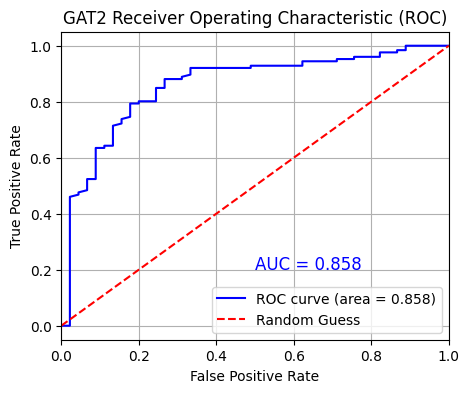

In [20]:
# Predict probabilities for the positive class
y_scores = model.predict_proba(test_data)[:, 1]
y_true = citeseer_graph.y[citeseer_graph.test_mask]

y_scores_array = y_scores.detach().numpy()
y_true_array = y_true.detach().numpy()

# plot ROC curve for the model
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    #print(fpr)  
    #rint(tpr)
    
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.3f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    # add labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('GAT2 Receiver Operating Characteristic (ROC)')

    # add AUC value to the plot
    plt.text(0.5, 0.2, 'AUC = {:.3f}'.format(roc_auc), fontsize=12, color='blue')
    plt.legend(loc='lower right')

    # print the AUC value
    print(f'AUC: {roc_auc:.3f}')

    plt.grid()
    
plot_roc_curve(y_true_array,y_scores_array)

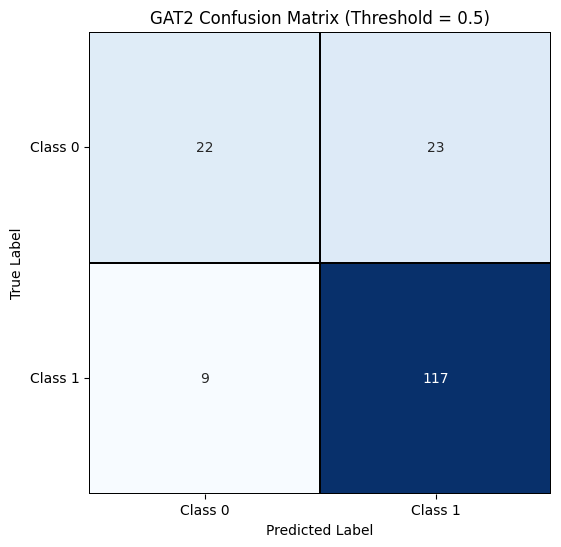

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the threshold for the positive class
threshold = 0.5

# Get probabilities for the positive class (y_scores is a tensor)
y_scores = model.predict_proba(test_data)[:, 1]
# Convert predicted probabilities tensor to numpy array after applying threshold
y_pred = (y_scores >= threshold).cpu().numpy().astype(int)

# Get true labels as a numpy array
y_true = test_data.y.cpu().numpy()

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
cm_df.index.name = 'True Label'
cm_df.columns.name = 'Predicted Label'
cm_df = cm_df.rename(index={0: 'Class 0', 1: 'Class 1'},
                     columns={0: 'Class 0', 1: 'Class 1'})

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, 
            linewidths=0.2, linecolor="black")
plt.title(f'GAT2 Confusion Matrix (Threshold = {threshold})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()